# Advanced Machine Learning and Artificial Intelligence (MScA 32017)

# Anomalies Detection with Autoencoders

## Notebook 1: Undercomplete Linear Autoencoder. Comparison with PCA


## Yuri Balasanov, Mihail Tselishchev, &copy; iLykei 2018

##### Main text: Hands-On Machine Learning with Scikit-Learn and TensorFlow, Aurelien Geron, &copy; Aurelien Geron 2017, O'Reilly Media, Inc

This notebook shows similarity between autoencoder and PCA model. This example is based on Chapter 15 of the book. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)

## PCA model

Recall US Treasury constant maturity yields data from course project on Statistical Analysis:

In [3]:
import numpy as np
import pandas as pd

RatesData = pd.read_csv("RegressionAssignmentData2014.csv", index_col="Date").iloc[:,:7]
RatesData.head()

,USGG3M,USGG6M,USGG2YR,USGG3YR,USGG5YR,USGG10YR,USGG30YR
Date,,,,,,,
1/5/1981,13.52,13.09,12.289,12.28,12.294,12.152,11.672
1/6/1981,13.58,13.16,12.429,12.31,12.214,12.112,11.672
1/7/1981,14.50,13.90,12.929,12.78,12.614,12.382,11.892
1/8/1981,14.76,14.00,13.099,12.95,12.684,12.352,11.912
1/9/1981,15.20,14.30,13.539,13.28,12.884,12.572,12.132


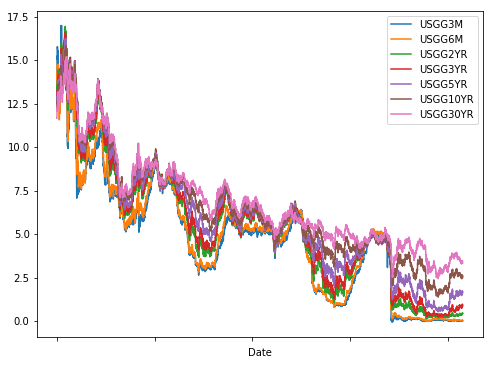

In [4]:
RatesData.plot();

Apply PCA with 2 factors:

In [5]:
from sklearn.decomposition import PCA
from sklearn import linear_model

pca = PCA(svd_solver='full')
pca.fit(RatesData)
print('Explained variance by factors:\n', pca.explained_variance_.round(1))

Explained variance by factors:
 [76.8  1.6  0.1  0.   0.   0.   0. ]


In [6]:
pca_factors = pd.DataFrame(pca.transform(RatesData), 
                           columns=['pca.f{}'.format(i+1) for i in range(pca.n_components_)], 
                           index=RatesData.index)
pca_factors.head()

,pca.f1,pca.f2,pca.f3,pca.f4,pca.f5,pca.f6,pca.f7
Date,,,,,,,
1/5/1981,18.015526,2.240277,1.461149,-0.312196,-0.279501,0.013620,-0.076006
1/6/1981,18.091398,2.352346,1.442377,-0.202098,-0.210543,0.049509,-0.063091
1/7/1981,19.447314,2.862932,1.644084,-0.273818,-0.195516,0.019348,-0.068359
1/8/1981,19.748510,3.040712,1.633909,-0.302649,-0.066708,-0.021750,-0.076101
1/9/1981,20.572042,3.177974,1.661795,-0.257780,0.076036,0.027921,-0.061264


Plot first two factors:

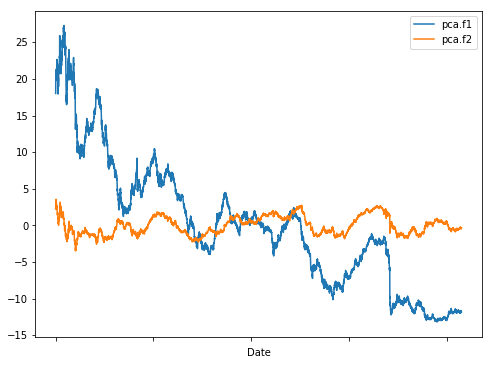

In [7]:
pca_factors[['pca.f1', 'pca.f2']].plot();

Extract factor loadings.

In [8]:
maturities = pd.DataFrame({'maturities':[0.25,0.5,2,3,5,10,30]})
pca_loadings = pd.DataFrame(pca.components_)
pca_loadings = pca_loadings.transpose()
pca_loadings.columns = ['pca.l{}'.format(i+1) for i in range(pca.n_components_)]
pca_loadings = maturities.join(pca_loadings)
pca_loadings

,maturities,pca.l1,pca.l2,pca.l3,pca.l4,pca.l5,pca.l6,pca.l7
0,0.25,0.383961,0.507445,0.529822,-0.403735,0.386088,0.039763,0.026743
1,0.50,0.390187,0.439461,0.111474,0.405264,-0.678762,-0.094755,-0.090914
2,2.00,0.415185,0.111127,-0.418787,0.408969,0.378721,0.298486,0.490010
3,3.00,0.406354,-0.016970,-0.447656,-0.064337,0.236245,-0.197600,-0.731571
4,5.00,0.386061,-0.231403,-0.246236,-0.533577,-0.286846,-0.421258,0.438560
5,10.00,0.347754,-0.432460,0.150090,-0.198565,-0.256243,0.735619,-0.152628
6,30.00,0.304712,-0.544212,0.497920,0.420988,0.207451,-0.377767,0.009200


Print and plot first 2 factor loadings.

PCA loadings: 
    maturities    pca.l1    pca.l2
0        0.25  0.383961  0.507445
1        0.50  0.390187  0.439461
2        2.00  0.415185  0.111127
3        3.00  0.406354 -0.016970
4        5.00  0.386061 -0.231403
5       10.00  0.347754 -0.432460
6       30.00  0.304712 -0.544212


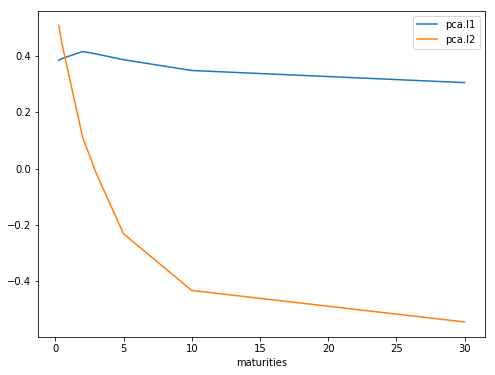

In [9]:
print('PCA loadings: \n',pca_loadings.iloc[:,0:3])
pca_loadings.plot(x='maturities',y=['pca.l1','pca.l2'])

Obtain the same factor loadings by multiple regression with PCA factor as response.

In [10]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the models for both factors 
rf1 = regr.fit(RatesData, pca_factors['pca.f1'])
reg_l1 =pd.DataFrame({'reg.l1': rf1.coef_})

rf2 = regr.fit(RatesData, pca_factors['pca.f2'])
reg_l2 =pd.DataFrame({'reg.l2': rf2.coef_})

loadings_by_regression = maturities.join([reg_l1,reg_l2])
print('Loadings by regression: \n',loadings_by_regression)

Loadings by regression: 
    maturities    reg.l1    reg.l2
0        0.25  0.383961  0.507445
1        0.50  0.390187  0.439461
2        2.00  0.415185  0.111127
3        3.00  0.406354 -0.016970
4        5.00  0.386061 -0.231403
5       10.00  0.347754 -0.432460
6       30.00  0.304712 -0.544212


## Autoencoder

Now build simple autoencoder with one hidden dense layer with 2 neurons and output layer of the same shape as input.

Neither biases nor activation functions are used.

In [11]:
np.random.seed(12345678)

In [12]:
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import Adam

Using TensorFlow backend.


In [13]:
encoding_dim = 2
# encode:
input_layer = Input(shape=(RatesData.shape[1],))
encoded_layer = Dense(encoding_dim, use_bias=False, activation=None)
encoded = encoded_layer(input_layer)

# decode:
input_encoded = Input((encoding_dim,))
decoded_layer = Dense(RatesData.shape[1], use_bias=False, activation=None)
decoded = decoded_layer(input_encoded)

# models:
encoder = Model(input_layer, encoded, name="encoder")
decoder = Model(input_encoded, decoded, name="decoder")
autoencoder = Model(input_layer, decoder(encoder(input_layer)), name="autoencoder")

lr = 0.0005 # learning rate, defaults to 0.001
autoencoder.compile(optimizer=Adam(lr), loss='mse')  

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
encoder (Model)              (None, 2)                 14        
_________________________________________________________________
decoder (Model)              (None, 7)                 14        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


Train autoencoder using normalized data.

Note that `Y` coincides with `X` since this is unsupervised learning.

In [14]:
RatesNormalized = (RatesData - RatesData.mean() ) / RatesData.std()
autoencoder.fit(RatesNormalized, RatesNormalized,
                verbose=2,
                epochs=6000,
                batch_size=RatesData.shape[0])

Epoch 1/6000
 - 0s - loss: 0.8049
Epoch 2/6000
 - 0s - loss: 0.8037
Epoch 3/6000
 - 0s - loss: 0.8026
Epoch 4/6000
 - 0s - loss: 0.8014
Epoch 5/6000
 - 0s - loss: 0.8002
Epoch 6/6000
 - 0s - loss: 0.7990
Epoch 7/6000
 - 0s - loss: 0.7979
Epoch 8/6000
 - 0s - loss: 0.7967
Epoch 9/6000
 - 0s - loss: 0.7955
Epoch 10/6000
 - 0s - loss: 0.7944
Epoch 11/6000
 - 0s - loss: 0.7932
Epoch 12/6000
 - 0s - loss: 0.7920
Epoch 13/6000
 - 0s - loss: 0.7908
Epoch 14/6000
 - 0s - loss: 0.7897
Epoch 15/6000
 - 0s - loss: 0.7885
Epoch 16/6000
 - 0s - loss: 0.7873
Epoch 17/6000
 - 0s - loss: 0.7861
Epoch 18/6000
 - 0s - loss: 0.7850
Epoch 19/6000
 - 0s - loss: 0.7838
Epoch 20/6000
 - 0s - loss: 0.7826
Epoch 21/6000
 - 0s - loss: 0.7814
Epoch 22/6000
 - 0s - loss: 0.7803
Epoch 23/6000
 - 0s - loss: 0.7791
Epoch 24/6000
 - 0s - loss: 0.7779
Epoch 25/6000
 - 0s - loss: 0.7767
Epoch 26/6000
 - 0s - loss: 0.7756
Epoch 27/6000
 - 0s - loss: 0.7744
Epoch 28/6000
 - 0s - loss: 0.7732
Epoch 29/6000
 - 0s - loss: 0

Epoch 232/6000
 - 0s - loss: 0.5497
Epoch 233/6000
 - 0s - loss: 0.5487
Epoch 234/6000
 - 0s - loss: 0.5478
Epoch 235/6000
 - 0s - loss: 0.5468
Epoch 236/6000
 - 0s - loss: 0.5458
Epoch 237/6000
 - 0s - loss: 0.5448
Epoch 238/6000
 - 0s - loss: 0.5438
Epoch 239/6000
 - 0s - loss: 0.5429
Epoch 240/6000
 - 0s - loss: 0.5419
Epoch 241/6000
 - 0s - loss: 0.5409
Epoch 242/6000
 - 0s - loss: 0.5400
Epoch 243/6000
 - 0s - loss: 0.5390
Epoch 244/6000
 - 0s - loss: 0.5380
Epoch 245/6000
 - 0s - loss: 0.5371
Epoch 246/6000
 - 0s - loss: 0.5361
Epoch 247/6000
 - 0s - loss: 0.5351
Epoch 248/6000
 - 0s - loss: 0.5342
Epoch 249/6000
 - 0s - loss: 0.5332
Epoch 250/6000
 - 0s - loss: 0.5322
Epoch 251/6000
 - 0s - loss: 0.5313
Epoch 252/6000
 - 0s - loss: 0.5303
Epoch 253/6000
 - 0s - loss: 0.5294
Epoch 254/6000
 - 0s - loss: 0.5284
Epoch 255/6000
 - 0s - loss: 0.5274
Epoch 256/6000
 - 0s - loss: 0.5265
Epoch 257/6000
 - 0s - loss: 0.5255
Epoch 258/6000
 - 0s - loss: 0.5246
Epoch 259/6000
 - 0s - loss:

Epoch 460/6000
 - 0s - loss: 0.3453
Epoch 461/6000
 - 0s - loss: 0.3444
Epoch 462/6000
 - 0s - loss: 0.3436
Epoch 463/6000
 - 0s - loss: 0.3427
Epoch 464/6000
 - 0s - loss: 0.3419
Epoch 465/6000
 - 0s - loss: 0.3411
Epoch 466/6000
 - 0s - loss: 0.3402
Epoch 467/6000
 - 0s - loss: 0.3394
Epoch 468/6000
 - 0s - loss: 0.3385
Epoch 469/6000
 - 0s - loss: 0.3377
Epoch 470/6000
 - 0s - loss: 0.3369
Epoch 471/6000
 - 0s - loss: 0.3360
Epoch 472/6000
 - 0s - loss: 0.3352
Epoch 473/6000
 - 0s - loss: 0.3344
Epoch 474/6000
 - 0s - loss: 0.3335
Epoch 475/6000
 - 0s - loss: 0.3327
Epoch 476/6000
 - 0s - loss: 0.3318
Epoch 477/6000
 - 0s - loss: 0.3310
Epoch 478/6000
 - 0s - loss: 0.3302
Epoch 479/6000
 - 0s - loss: 0.3293
Epoch 480/6000
 - 0s - loss: 0.3285
Epoch 481/6000
 - 0s - loss: 0.3277
Epoch 482/6000
 - 0s - loss: 0.3268
Epoch 483/6000
 - 0s - loss: 0.3260
Epoch 484/6000
 - 0s - loss: 0.3252
Epoch 485/6000
 - 0s - loss: 0.3243
Epoch 486/6000
 - 0s - loss: 0.3235
Epoch 487/6000
 - 0s - loss:

Epoch 688/6000
 - 0s - loss: 0.1618
Epoch 689/6000
 - 0s - loss: 0.1610
Epoch 690/6000
 - 0s - loss: 0.1603
Epoch 691/6000
 - 0s - loss: 0.1595
Epoch 692/6000
 - 0s - loss: 0.1588
Epoch 693/6000
 - 0s - loss: 0.1580
Epoch 694/6000
 - 0s - loss: 0.1573
Epoch 695/6000
 - 0s - loss: 0.1565
Epoch 696/6000
 - 0s - loss: 0.1558
Epoch 697/6000
 - 0s - loss: 0.1551
Epoch 698/6000
 - 0s - loss: 0.1543
Epoch 699/6000
 - 0s - loss: 0.1536
Epoch 700/6000
 - 0s - loss: 0.1528
Epoch 701/6000
 - 0s - loss: 0.1521
Epoch 702/6000
 - 0s - loss: 0.1514
Epoch 703/6000
 - 0s - loss: 0.1506
Epoch 704/6000
 - 0s - loss: 0.1499
Epoch 705/6000
 - 0s - loss: 0.1492
Epoch 706/6000
 - 0s - loss: 0.1484
Epoch 707/6000
 - 0s - loss: 0.1477
Epoch 708/6000
 - 0s - loss: 0.1470
Epoch 709/6000
 - 0s - loss: 0.1463
Epoch 710/6000
 - 0s - loss: 0.1455
Epoch 711/6000
 - 0s - loss: 0.1448
Epoch 712/6000
 - 0s - loss: 0.1441
Epoch 713/6000
 - 0s - loss: 0.1434
Epoch 714/6000
 - 0s - loss: 0.1426
Epoch 715/6000
 - 0s - loss:

Epoch 916/6000
 - 0s - loss: 0.0421
Epoch 917/6000
 - 0s - loss: 0.0419
Epoch 918/6000
 - 0s - loss: 0.0417
Epoch 919/6000
 - 0s - loss: 0.0415
Epoch 920/6000
 - 0s - loss: 0.0412
Epoch 921/6000
 - 0s - loss: 0.0410
Epoch 922/6000
 - 0s - loss: 0.0408
Epoch 923/6000
 - 0s - loss: 0.0406
Epoch 924/6000
 - 0s - loss: 0.0404
Epoch 925/6000
 - 0s - loss: 0.0402
Epoch 926/6000
 - 0s - loss: 0.0400
Epoch 927/6000
 - 0s - loss: 0.0398
Epoch 928/6000
 - 0s - loss: 0.0396
Epoch 929/6000
 - 0s - loss: 0.0394
Epoch 930/6000
 - 0s - loss: 0.0392
Epoch 931/6000
 - 0s - loss: 0.0390
Epoch 932/6000
 - 0s - loss: 0.0388
Epoch 933/6000
 - 0s - loss: 0.0386
Epoch 934/6000
 - 0s - loss: 0.0385
Epoch 935/6000
 - 0s - loss: 0.0383
Epoch 936/6000
 - 0s - loss: 0.0381
Epoch 937/6000
 - 0s - loss: 0.0379
Epoch 938/6000
 - 0s - loss: 0.0377
Epoch 939/6000
 - 0s - loss: 0.0376
Epoch 940/6000
 - 0s - loss: 0.0374
Epoch 941/6000
 - 0s - loss: 0.0372
Epoch 942/6000
 - 0s - loss: 0.0371
Epoch 943/6000
 - 0s - loss:

Epoch 1140/6000
 - 0s - loss: 0.0264
Epoch 1141/6000
 - 0s - loss: 0.0264
Epoch 1142/6000
 - 0s - loss: 0.0264
Epoch 1143/6000
 - 0s - loss: 0.0264
Epoch 1144/6000
 - 0s - loss: 0.0264
Epoch 1145/6000
 - 0s - loss: 0.0264
Epoch 1146/6000
 - 0s - loss: 0.0264
Epoch 1147/6000
 - 0s - loss: 0.0263
Epoch 1148/6000
 - 0s - loss: 0.0263
Epoch 1149/6000
 - 0s - loss: 0.0263
Epoch 1150/6000
 - 0s - loss: 0.0263
Epoch 1151/6000
 - 0s - loss: 0.0263
Epoch 1152/6000
 - 0s - loss: 0.0263
Epoch 1153/6000
 - 0s - loss: 0.0263
Epoch 1154/6000
 - 0s - loss: 0.0263
Epoch 1155/6000
 - 0s - loss: 0.0263
Epoch 1156/6000
 - 0s - loss: 0.0263
Epoch 1157/6000
 - 0s - loss: 0.0263
Epoch 1158/6000
 - 0s - loss: 0.0263
Epoch 1159/6000
 - 0s - loss: 0.0262
Epoch 1160/6000
 - 0s - loss: 0.0262
Epoch 1161/6000
 - 0s - loss: 0.0262
Epoch 1162/6000
 - 0s - loss: 0.0262
Epoch 1163/6000
 - 0s - loss: 0.0262
Epoch 1164/6000
 - 0s - loss: 0.0262
Epoch 1165/6000
 - 0s - loss: 0.0262
Epoch 1166/6000
 - 0s - loss: 0.0262
E

 - 0s - loss: 0.0253
Epoch 1362/6000
 - 0s - loss: 0.0253
Epoch 1363/6000
 - 0s - loss: 0.0253
Epoch 1364/6000
 - 0s - loss: 0.0253
Epoch 1365/6000
 - 0s - loss: 0.0253
Epoch 1366/6000
 - 0s - loss: 0.0252
Epoch 1367/6000
 - 0s - loss: 0.0252
Epoch 1368/6000
 - 0s - loss: 0.0252
Epoch 1369/6000
 - 0s - loss: 0.0252
Epoch 1370/6000
 - 0s - loss: 0.0252
Epoch 1371/6000
 - 0s - loss: 0.0252
Epoch 1372/6000
 - 0s - loss: 0.0252
Epoch 1373/6000
 - 0s - loss: 0.0252
Epoch 1374/6000
 - 0s - loss: 0.0252
Epoch 1375/6000
 - 0s - loss: 0.0252
Epoch 1376/6000
 - 0s - loss: 0.0252
Epoch 1377/6000
 - 0s - loss: 0.0252
Epoch 1378/6000
 - 0s - loss: 0.0252
Epoch 1379/6000
 - 0s - loss: 0.0252
Epoch 1380/6000
 - 0s - loss: 0.0252
Epoch 1381/6000
 - 0s - loss: 0.0252
Epoch 1382/6000
 - 0s - loss: 0.0252
Epoch 1383/6000
 - 0s - loss: 0.0252
Epoch 1384/6000
 - 0s - loss: 0.0252
Epoch 1385/6000
 - 0s - loss: 0.0252
Epoch 1386/6000
 - 0s - loss: 0.0252
Epoch 1387/6000
 - 0s - loss: 0.0252
Epoch 1388/6000
 

Epoch 1583/6000
 - 0s - loss: 0.0246
Epoch 1584/6000
 - 0s - loss: 0.0246
Epoch 1585/6000
 - 0s - loss: 0.0246
Epoch 1586/6000
 - 0s - loss: 0.0246
Epoch 1587/6000
 - 0s - loss: 0.0246
Epoch 1588/6000
 - 0s - loss: 0.0246
Epoch 1589/6000
 - 0s - loss: 0.0246
Epoch 1590/6000
 - 0s - loss: 0.0246
Epoch 1591/6000
 - 0s - loss: 0.0246
Epoch 1592/6000
 - 0s - loss: 0.0246
Epoch 1593/6000
 - 0s - loss: 0.0246
Epoch 1594/6000
 - 0s - loss: 0.0246
Epoch 1595/6000
 - 0s - loss: 0.0246
Epoch 1596/6000
 - 0s - loss: 0.0246
Epoch 1597/6000
 - 0s - loss: 0.0246
Epoch 1598/6000
 - 0s - loss: 0.0246
Epoch 1599/6000
 - 0s - loss: 0.0246
Epoch 1600/6000
 - 0s - loss: 0.0246
Epoch 1601/6000
 - 0s - loss: 0.0246
Epoch 1602/6000
 - 0s - loss: 0.0245
Epoch 1603/6000
 - 0s - loss: 0.0245
Epoch 1604/6000
 - 0s - loss: 0.0245
Epoch 1605/6000
 - 0s - loss: 0.0245
Epoch 1606/6000
 - 0s - loss: 0.0245
Epoch 1607/6000
 - 0s - loss: 0.0245
Epoch 1608/6000
 - 0s - loss: 0.0245
Epoch 1609/6000
 - 0s - loss: 0.0245
E

 - 0s - loss: 0.0242
Epoch 1805/6000
 - 0s - loss: 0.0242
Epoch 1806/6000
 - 0s - loss: 0.0242
Epoch 1807/6000
 - 0s - loss: 0.0242
Epoch 1808/6000
 - 0s - loss: 0.0242
Epoch 1809/6000
 - 0s - loss: 0.0242
Epoch 1810/6000
 - 0s - loss: 0.0242
Epoch 1811/6000
 - 0s - loss: 0.0242
Epoch 1812/6000
 - 0s - loss: 0.0242
Epoch 1813/6000
 - 0s - loss: 0.0242
Epoch 1814/6000
 - 0s - loss: 0.0242
Epoch 1815/6000
 - 0s - loss: 0.0242
Epoch 1816/6000
 - 0s - loss: 0.0241
Epoch 1817/6000
 - 0s - loss: 0.0241
Epoch 1818/6000
 - 0s - loss: 0.0241
Epoch 1819/6000
 - 0s - loss: 0.0241
Epoch 1820/6000
 - 0s - loss: 0.0241
Epoch 1821/6000
 - 0s - loss: 0.0241
Epoch 1822/6000
 - 0s - loss: 0.0241
Epoch 1823/6000
 - 0s - loss: 0.0241
Epoch 1824/6000
 - 0s - loss: 0.0241
Epoch 1825/6000
 - 0s - loss: 0.0241
Epoch 1826/6000
 - 0s - loss: 0.0241
Epoch 1827/6000
 - 0s - loss: 0.0241
Epoch 1828/6000
 - 0s - loss: 0.0241
Epoch 1829/6000
 - 0s - loss: 0.0241
Epoch 1830/6000
 - 0s - loss: 0.0241
Epoch 1831/6000
 

Epoch 2026/6000
 - 0s - loss: 0.0239
Epoch 2027/6000
 - 0s - loss: 0.0239
Epoch 2028/6000
 - 0s - loss: 0.0239
Epoch 2029/6000
 - 0s - loss: 0.0239
Epoch 2030/6000
 - 0s - loss: 0.0239
Epoch 2031/6000
 - 0s - loss: 0.0239
Epoch 2032/6000
 - 0s - loss: 0.0239
Epoch 2033/6000
 - 0s - loss: 0.0239
Epoch 2034/6000
 - 0s - loss: 0.0239
Epoch 2035/6000
 - 0s - loss: 0.0239
Epoch 2036/6000
 - 0s - loss: 0.0239
Epoch 2037/6000
 - 0s - loss: 0.0239
Epoch 2038/6000
 - 0s - loss: 0.0239
Epoch 2039/6000
 - 0s - loss: 0.0239
Epoch 2040/6000
 - 0s - loss: 0.0239
Epoch 2041/6000
 - 0s - loss: 0.0239
Epoch 2042/6000
 - 0s - loss: 0.0239
Epoch 2043/6000
 - 0s - loss: 0.0239
Epoch 2044/6000
 - 0s - loss: 0.0239
Epoch 2045/6000
 - 0s - loss: 0.0239
Epoch 2046/6000
 - 0s - loss: 0.0239
Epoch 2047/6000
 - 0s - loss: 0.0239
Epoch 2048/6000
 - 0s - loss: 0.0239
Epoch 2049/6000
 - 0s - loss: 0.0239
Epoch 2050/6000
 - 0s - loss: 0.0239
Epoch 2051/6000
 - 0s - loss: 0.0239
Epoch 2052/6000
 - 0s - loss: 0.0239
E

 - 0s - loss: 0.0237
Epoch 2248/6000
 - 0s - loss: 0.0237
Epoch 2249/6000
 - 0s - loss: 0.0237
Epoch 2250/6000
 - 0s - loss: 0.0237
Epoch 2251/6000
 - 0s - loss: 0.0237
Epoch 2252/6000
 - 0s - loss: 0.0237
Epoch 2253/6000
 - 0s - loss: 0.0237
Epoch 2254/6000
 - 0s - loss: 0.0237
Epoch 2255/6000
 - 0s - loss: 0.0237
Epoch 2256/6000
 - 0s - loss: 0.0237
Epoch 2257/6000
 - 0s - loss: 0.0237
Epoch 2258/6000
 - 0s - loss: 0.0237
Epoch 2259/6000
 - 0s - loss: 0.0237
Epoch 2260/6000
 - 0s - loss: 0.0237
Epoch 2261/6000
 - 0s - loss: 0.0237
Epoch 2262/6000
 - 0s - loss: 0.0237
Epoch 2263/6000
 - 0s - loss: 0.0237
Epoch 2264/6000
 - 0s - loss: 0.0237
Epoch 2265/6000
 - 0s - loss: 0.0237
Epoch 2266/6000
 - 0s - loss: 0.0237
Epoch 2267/6000
 - 0s - loss: 0.0237
Epoch 2268/6000
 - 0s - loss: 0.0237
Epoch 2269/6000
 - 0s - loss: 0.0237
Epoch 2270/6000
 - 0s - loss: 0.0237
Epoch 2271/6000
 - 0s - loss: 0.0237
Epoch 2272/6000
 - 0s - loss: 0.0237
Epoch 2273/6000
 - 0s - loss: 0.0237
Epoch 2274/6000
 

Epoch 2469/6000
 - 0s - loss: 0.0235
Epoch 2470/6000
 - 0s - loss: 0.0235
Epoch 2471/6000
 - 0s - loss: 0.0235
Epoch 2472/6000
 - 0s - loss: 0.0235
Epoch 2473/6000
 - 0s - loss: 0.0235
Epoch 2474/6000
 - 0s - loss: 0.0235
Epoch 2475/6000
 - 0s - loss: 0.0235
Epoch 2476/6000
 - 0s - loss: 0.0235
Epoch 2477/6000
 - 0s - loss: 0.0235
Epoch 2478/6000
 - 0s - loss: 0.0235
Epoch 2479/6000
 - 0s - loss: 0.0235
Epoch 2480/6000
 - 0s - loss: 0.0235
Epoch 2481/6000
 - 0s - loss: 0.0235
Epoch 2482/6000
 - 0s - loss: 0.0235
Epoch 2483/6000
 - 0s - loss: 0.0235
Epoch 2484/6000
 - 0s - loss: 0.0235
Epoch 2485/6000
 - 0s - loss: 0.0235
Epoch 2486/6000
 - 0s - loss: 0.0235
Epoch 2487/6000
 - 0s - loss: 0.0235
Epoch 2488/6000
 - 0s - loss: 0.0235
Epoch 2489/6000
 - 0s - loss: 0.0235
Epoch 2490/6000
 - 0s - loss: 0.0235
Epoch 2491/6000
 - 0s - loss: 0.0235
Epoch 2492/6000
 - 0s - loss: 0.0235
Epoch 2493/6000
 - 0s - loss: 0.0235
Epoch 2494/6000
 - 0s - loss: 0.0235
Epoch 2495/6000
 - 0s - loss: 0.0235
E

 - 0s - loss: 0.0233
Epoch 2691/6000
 - 0s - loss: 0.0233
Epoch 2692/6000
 - 0s - loss: 0.0233
Epoch 2693/6000
 - 0s - loss: 0.0233
Epoch 2694/6000
 - 0s - loss: 0.0233
Epoch 2695/6000
 - 0s - loss: 0.0233
Epoch 2696/6000
 - 0s - loss: 0.0233
Epoch 2697/6000
 - 0s - loss: 0.0233
Epoch 2698/6000
 - 0s - loss: 0.0233
Epoch 2699/6000
 - 0s - loss: 0.0233
Epoch 2700/6000
 - 0s - loss: 0.0233
Epoch 2701/6000
 - 0s - loss: 0.0233
Epoch 2702/6000
 - 0s - loss: 0.0233
Epoch 2703/6000
 - 0s - loss: 0.0233
Epoch 2704/6000
 - 0s - loss: 0.0233
Epoch 2705/6000
 - 0s - loss: 0.0233
Epoch 2706/6000
 - 0s - loss: 0.0233
Epoch 2707/6000
 - 0s - loss: 0.0233
Epoch 2708/6000
 - 0s - loss: 0.0233
Epoch 2709/6000
 - 0s - loss: 0.0233
Epoch 2710/6000
 - 0s - loss: 0.0233
Epoch 2711/6000
 - 0s - loss: 0.0233
Epoch 2712/6000
 - 0s - loss: 0.0233
Epoch 2713/6000
 - 0s - loss: 0.0233
Epoch 2714/6000
 - 0s - loss: 0.0233
Epoch 2715/6000
 - 0s - loss: 0.0233
Epoch 2716/6000
 - 0s - loss: 0.0233
Epoch 2717/6000
 

Epoch 2912/6000
 - 0s - loss: 0.0231
Epoch 2913/6000
 - 0s - loss: 0.0231
Epoch 2914/6000
 - 0s - loss: 0.0231
Epoch 2915/6000
 - 0s - loss: 0.0231
Epoch 2916/6000
 - 0s - loss: 0.0231
Epoch 2917/6000
 - 0s - loss: 0.0231
Epoch 2918/6000
 - 0s - loss: 0.0231
Epoch 2919/6000
 - 0s - loss: 0.0231
Epoch 2920/6000
 - 0s - loss: 0.0231
Epoch 2921/6000
 - 0s - loss: 0.0231
Epoch 2922/6000
 - 0s - loss: 0.0231
Epoch 2923/6000
 - 0s - loss: 0.0231
Epoch 2924/6000
 - 0s - loss: 0.0231
Epoch 2925/6000
 - 0s - loss: 0.0231
Epoch 2926/6000
 - 0s - loss: 0.0231
Epoch 2927/6000
 - 0s - loss: 0.0231
Epoch 2928/6000
 - 0s - loss: 0.0231
Epoch 2929/6000
 - 0s - loss: 0.0231
Epoch 2930/6000
 - 0s - loss: 0.0231
Epoch 2931/6000
 - 0s - loss: 0.0231
Epoch 2932/6000
 - 0s - loss: 0.0231
Epoch 2933/6000
 - 0s - loss: 0.0231
Epoch 2934/6000
 - 0s - loss: 0.0231
Epoch 2935/6000
 - 0s - loss: 0.0231
Epoch 2936/6000
 - 0s - loss: 0.0231
Epoch 2937/6000
 - 0s - loss: 0.0231
Epoch 2938/6000
 - 0s - loss: 0.0231
E

 - 0s - loss: 0.0228
Epoch 3134/6000
 - 0s - loss: 0.0228
Epoch 3135/6000
 - 0s - loss: 0.0228
Epoch 3136/6000
 - 0s - loss: 0.0228
Epoch 3137/6000
 - 0s - loss: 0.0228
Epoch 3138/6000
 - 0s - loss: 0.0228
Epoch 3139/6000
 - 0s - loss: 0.0228
Epoch 3140/6000
 - 0s - loss: 0.0228
Epoch 3141/6000
 - 0s - loss: 0.0228
Epoch 3142/6000
 - 0s - loss: 0.0228
Epoch 3143/6000
 - 0s - loss: 0.0227
Epoch 3144/6000
 - 0s - loss: 0.0227
Epoch 3145/6000
 - 0s - loss: 0.0227
Epoch 3146/6000
 - 0s - loss: 0.0227
Epoch 3147/6000
 - 0s - loss: 0.0227
Epoch 3148/6000
 - 0s - loss: 0.0227
Epoch 3149/6000
 - 0s - loss: 0.0227
Epoch 3150/6000
 - 0s - loss: 0.0227
Epoch 3151/6000
 - 0s - loss: 0.0227
Epoch 3152/6000
 - 0s - loss: 0.0227
Epoch 3153/6000
 - 0s - loss: 0.0227
Epoch 3154/6000
 - 0s - loss: 0.0227
Epoch 3155/6000
 - 0s - loss: 0.0227
Epoch 3156/6000
 - 0s - loss: 0.0227
Epoch 3157/6000
 - 0s - loss: 0.0227
Epoch 3158/6000
 - 0s - loss: 0.0227
Epoch 3159/6000
 - 0s - loss: 0.0227
Epoch 3160/6000
 

Epoch 3355/6000
 - 0s - loss: 0.0222
Epoch 3356/6000
 - 0s - loss: 0.0222
Epoch 3357/6000
 - 0s - loss: 0.0222
Epoch 3358/6000
 - 0s - loss: 0.0222
Epoch 3359/6000
 - 0s - loss: 0.0222
Epoch 3360/6000
 - 0s - loss: 0.0222
Epoch 3361/6000
 - 0s - loss: 0.0222
Epoch 3362/6000
 - 0s - loss: 0.0222
Epoch 3363/6000
 - 0s - loss: 0.0222
Epoch 3364/6000
 - 0s - loss: 0.0222
Epoch 3365/6000
 - 0s - loss: 0.0222
Epoch 3366/6000
 - 0s - loss: 0.0222
Epoch 3367/6000
 - 0s - loss: 0.0222
Epoch 3368/6000
 - 0s - loss: 0.0222
Epoch 3369/6000
 - 0s - loss: 0.0222
Epoch 3370/6000
 - 0s - loss: 0.0222
Epoch 3371/6000
 - 0s - loss: 0.0222
Epoch 3372/6000
 - 0s - loss: 0.0222
Epoch 3373/6000
 - 0s - loss: 0.0222
Epoch 3374/6000
 - 0s - loss: 0.0222
Epoch 3375/6000
 - 0s - loss: 0.0222
Epoch 3376/6000
 - 0s - loss: 0.0222
Epoch 3377/6000
 - 0s - loss: 0.0222
Epoch 3378/6000
 - 0s - loss: 0.0222
Epoch 3379/6000
 - 0s - loss: 0.0222
Epoch 3380/6000
 - 0s - loss: 0.0222
Epoch 3381/6000
 - 0s - loss: 0.0222
E

 - 0s - loss: 0.0214
Epoch 3577/6000
 - 0s - loss: 0.0214
Epoch 3578/6000
 - 0s - loss: 0.0214
Epoch 3579/6000
 - 0s - loss: 0.0214
Epoch 3580/6000
 - 0s - loss: 0.0214
Epoch 3581/6000
 - 0s - loss: 0.0214
Epoch 3582/6000
 - 0s - loss: 0.0214
Epoch 3583/6000
 - 0s - loss: 0.0214
Epoch 3584/6000
 - 0s - loss: 0.0214
Epoch 3585/6000
 - 0s - loss: 0.0214
Epoch 3586/6000
 - 0s - loss: 0.0214
Epoch 3587/6000
 - 0s - loss: 0.0214
Epoch 3588/6000
 - 0s - loss: 0.0214
Epoch 3589/6000
 - 0s - loss: 0.0214
Epoch 3590/6000
 - 0s - loss: 0.0214
Epoch 3591/6000
 - 0s - loss: 0.0214
Epoch 3592/6000
 - 0s - loss: 0.0214
Epoch 3593/6000
 - 0s - loss: 0.0214
Epoch 3594/6000
 - 0s - loss: 0.0214
Epoch 3595/6000
 - 0s - loss: 0.0214
Epoch 3596/6000
 - 0s - loss: 0.0213
Epoch 3597/6000
 - 0s - loss: 0.0213
Epoch 3598/6000
 - 0s - loss: 0.0213
Epoch 3599/6000
 - 0s - loss: 0.0213
Epoch 3600/6000
 - 0s - loss: 0.0213
Epoch 3601/6000
 - 0s - loss: 0.0213
Epoch 3602/6000
 - 0s - loss: 0.0213
Epoch 3603/6000
 

Epoch 3798/6000
 - 0s - loss: 0.0202
Epoch 3799/6000
 - 0s - loss: 0.0202
Epoch 3800/6000
 - 0s - loss: 0.0202
Epoch 3801/6000
 - 0s - loss: 0.0202
Epoch 3802/6000
 - 0s - loss: 0.0202
Epoch 3803/6000
 - 0s - loss: 0.0202
Epoch 3804/6000
 - 0s - loss: 0.0202
Epoch 3805/6000
 - 0s - loss: 0.0201
Epoch 3806/6000
 - 0s - loss: 0.0201
Epoch 3807/6000
 - 0s - loss: 0.0201
Epoch 3808/6000
 - 0s - loss: 0.0201
Epoch 3809/6000
 - 0s - loss: 0.0201
Epoch 3810/6000
 - 0s - loss: 0.0201
Epoch 3811/6000
 - 0s - loss: 0.0201
Epoch 3812/6000
 - 0s - loss: 0.0201
Epoch 3813/6000
 - 0s - loss: 0.0201
Epoch 3814/6000
 - 0s - loss: 0.0201
Epoch 3815/6000
 - 0s - loss: 0.0201
Epoch 3816/6000
 - 0s - loss: 0.0201
Epoch 3817/6000
 - 0s - loss: 0.0201
Epoch 3818/6000
 - 0s - loss: 0.0201
Epoch 3819/6000
 - 0s - loss: 0.0200
Epoch 3820/6000
 - 0s - loss: 0.0200
Epoch 3821/6000
 - 0s - loss: 0.0200
Epoch 3822/6000
 - 0s - loss: 0.0200
Epoch 3823/6000
 - 0s - loss: 0.0200
Epoch 3824/6000
 - 0s - loss: 0.0200
E

 - 0s - loss: 0.0184
Epoch 4020/6000
 - 0s - loss: 0.0184
Epoch 4021/6000
 - 0s - loss: 0.0184
Epoch 4022/6000
 - 0s - loss: 0.0184
Epoch 4023/6000
 - 0s - loss: 0.0184
Epoch 4024/6000
 - 0s - loss: 0.0184
Epoch 4025/6000
 - 0s - loss: 0.0184
Epoch 4026/6000
 - 0s - loss: 0.0183
Epoch 4027/6000
 - 0s - loss: 0.0183
Epoch 4028/6000
 - 0s - loss: 0.0183
Epoch 4029/6000
 - 0s - loss: 0.0183
Epoch 4030/6000
 - 0s - loss: 0.0183
Epoch 4031/6000
 - 0s - loss: 0.0183
Epoch 4032/6000
 - 0s - loss: 0.0183
Epoch 4033/6000
 - 0s - loss: 0.0183
Epoch 4034/6000
 - 0s - loss: 0.0183
Epoch 4035/6000
 - 0s - loss: 0.0183
Epoch 4036/6000
 - 0s - loss: 0.0182
Epoch 4037/6000
 - 0s - loss: 0.0182
Epoch 4038/6000
 - 0s - loss: 0.0182
Epoch 4039/6000
 - 0s - loss: 0.0182
Epoch 4040/6000
 - 0s - loss: 0.0182
Epoch 4041/6000
 - 0s - loss: 0.0182
Epoch 4042/6000
 - 0s - loss: 0.0182
Epoch 4043/6000
 - 0s - loss: 0.0182
Epoch 4044/6000
 - 0s - loss: 0.0182
Epoch 4045/6000
 - 0s - loss: 0.0182
Epoch 4046/6000
 

Epoch 4241/6000
 - 0s - loss: 0.0161
Epoch 4242/6000
 - 0s - loss: 0.0161
Epoch 4243/6000
 - 0s - loss: 0.0161
Epoch 4244/6000
 - 0s - loss: 0.0161
Epoch 4245/6000
 - 0s - loss: 0.0161
Epoch 4246/6000
 - 0s - loss: 0.0161
Epoch 4247/6000
 - 0s - loss: 0.0161
Epoch 4248/6000
 - 0s - loss: 0.0161
Epoch 4249/6000
 - 0s - loss: 0.0160
Epoch 4250/6000
 - 0s - loss: 0.0160
Epoch 4251/6000
 - 0s - loss: 0.0160
Epoch 4252/6000
 - 0s - loss: 0.0160
Epoch 4253/6000
 - 0s - loss: 0.0160
Epoch 4254/6000
 - 0s - loss: 0.0160
Epoch 4255/6000
 - 0s - loss: 0.0160
Epoch 4256/6000
 - 0s - loss: 0.0160
Epoch 4257/6000
 - 0s - loss: 0.0160
Epoch 4258/6000
 - 0s - loss: 0.0159
Epoch 4259/6000
 - 0s - loss: 0.0159
Epoch 4260/6000
 - 0s - loss: 0.0159
Epoch 4261/6000
 - 0s - loss: 0.0159
Epoch 4262/6000
 - 0s - loss: 0.0159
Epoch 4263/6000
 - 0s - loss: 0.0159
Epoch 4264/6000
 - 0s - loss: 0.0159
Epoch 4265/6000
 - 0s - loss: 0.0159
Epoch 4266/6000
 - 0s - loss: 0.0159
Epoch 4267/6000
 - 0s - loss: 0.0158
E

 - 0s - loss: 0.0136
Epoch 4463/6000
 - 0s - loss: 0.0136
Epoch 4464/6000
 - 0s - loss: 0.0136
Epoch 4465/6000
 - 0s - loss: 0.0136
Epoch 4466/6000
 - 0s - loss: 0.0136
Epoch 4467/6000
 - 0s - loss: 0.0136
Epoch 4468/6000
 - 0s - loss: 0.0136
Epoch 4469/6000
 - 0s - loss: 0.0136
Epoch 4470/6000
 - 0s - loss: 0.0135
Epoch 4471/6000
 - 0s - loss: 0.0135
Epoch 4472/6000
 - 0s - loss: 0.0135
Epoch 4473/6000
 - 0s - loss: 0.0135
Epoch 4474/6000
 - 0s - loss: 0.0135
Epoch 4475/6000
 - 0s - loss: 0.0135
Epoch 4476/6000
 - 0s - loss: 0.0135
Epoch 4477/6000
 - 0s - loss: 0.0135
Epoch 4478/6000
 - 0s - loss: 0.0135
Epoch 4479/6000
 - 0s - loss: 0.0134
Epoch 4480/6000
 - 0s - loss: 0.0134
Epoch 4481/6000
 - 0s - loss: 0.0134
Epoch 4482/6000
 - 0s - loss: 0.0134
Epoch 4483/6000
 - 0s - loss: 0.0134
Epoch 4484/6000
 - 0s - loss: 0.0134
Epoch 4485/6000
 - 0s - loss: 0.0134
Epoch 4486/6000
 - 0s - loss: 0.0134
Epoch 4487/6000
 - 0s - loss: 0.0134
Epoch 4488/6000
 - 0s - loss: 0.0133
Epoch 4489/6000
 

Epoch 4684/6000
 - 0s - loss: 0.0112
Epoch 4685/6000
 - 0s - loss: 0.0112
Epoch 4686/6000
 - 0s - loss: 0.0112
Epoch 4687/6000
 - 0s - loss: 0.0112
Epoch 4688/6000
 - 0s - loss: 0.0112
Epoch 4689/6000
 - 0s - loss: 0.0112
Epoch 4690/6000
 - 0s - loss: 0.0111
Epoch 4691/6000
 - 0s - loss: 0.0111
Epoch 4692/6000
 - 0s - loss: 0.0111
Epoch 4693/6000
 - 0s - loss: 0.0111
Epoch 4694/6000
 - 0s - loss: 0.0111
Epoch 4695/6000
 - 0s - loss: 0.0111
Epoch 4696/6000
 - 0s - loss: 0.0111
Epoch 4697/6000
 - 0s - loss: 0.0111
Epoch 4698/6000
 - 0s - loss: 0.0111
Epoch 4699/6000
 - 0s - loss: 0.0111
Epoch 4700/6000
 - 0s - loss: 0.0110
Epoch 4701/6000
 - 0s - loss: 0.0110
Epoch 4702/6000
 - 0s - loss: 0.0110
Epoch 4703/6000
 - 0s - loss: 0.0110
Epoch 4704/6000
 - 0s - loss: 0.0110
Epoch 4705/6000
 - 0s - loss: 0.0110
Epoch 4706/6000
 - 0s - loss: 0.0110
Epoch 4707/6000
 - 0s - loss: 0.0110
Epoch 4708/6000
 - 0s - loss: 0.0110
Epoch 4709/6000
 - 0s - loss: 0.0109
Epoch 4710/6000
 - 0s - loss: 0.0109
E

 - 0s - loss: 0.0090
Epoch 4906/6000
 - 0s - loss: 0.0090
Epoch 4907/6000
 - 0s - loss: 0.0090
Epoch 4908/6000
 - 0s - loss: 0.0090
Epoch 4909/6000
 - 0s - loss: 0.0090
Epoch 4910/6000
 - 0s - loss: 0.0090
Epoch 4911/6000
 - 0s - loss: 0.0090
Epoch 4912/6000
 - 0s - loss: 0.0090
Epoch 4913/6000
 - 0s - loss: 0.0090
Epoch 4914/6000
 - 0s - loss: 0.0090
Epoch 4915/6000
 - 0s - loss: 0.0090
Epoch 4916/6000
 - 0s - loss: 0.0089
Epoch 4917/6000
 - 0s - loss: 0.0089
Epoch 4918/6000
 - 0s - loss: 0.0089
Epoch 4919/6000
 - 0s - loss: 0.0089
Epoch 4920/6000
 - 0s - loss: 0.0089
Epoch 4921/6000
 - 0s - loss: 0.0089
Epoch 4922/6000
 - 0s - loss: 0.0089
Epoch 4923/6000
 - 0s - loss: 0.0089
Epoch 4924/6000
 - 0s - loss: 0.0089
Epoch 4925/6000
 - 0s - loss: 0.0089
Epoch 4926/6000
 - 0s - loss: 0.0089
Epoch 4927/6000
 - 0s - loss: 0.0089
Epoch 4928/6000
 - 0s - loss: 0.0088
Epoch 4929/6000
 - 0s - loss: 0.0088
Epoch 4930/6000
 - 0s - loss: 0.0088
Epoch 4931/6000
 - 0s - loss: 0.0088
Epoch 4932/6000
 

Epoch 5127/6000
 - 0s - loss: 0.0072
Epoch 5128/6000
 - 0s - loss: 0.0072
Epoch 5129/6000
 - 0s - loss: 0.0072
Epoch 5130/6000
 - 0s - loss: 0.0072
Epoch 5131/6000
 - 0s - loss: 0.0072
Epoch 5132/6000
 - 0s - loss: 0.0072
Epoch 5133/6000
 - 0s - loss: 0.0072
Epoch 5134/6000
 - 0s - loss: 0.0072
Epoch 5135/6000
 - 0s - loss: 0.0072
Epoch 5136/6000
 - 0s - loss: 0.0072
Epoch 5137/6000
 - 0s - loss: 0.0072
Epoch 5138/6000
 - 0s - loss: 0.0071
Epoch 5139/6000
 - 0s - loss: 0.0071
Epoch 5140/6000
 - 0s - loss: 0.0071
Epoch 5141/6000
 - 0s - loss: 0.0071
Epoch 5142/6000
 - 0s - loss: 0.0071
Epoch 5143/6000
 - 0s - loss: 0.0071
Epoch 5144/6000
 - 0s - loss: 0.0071
Epoch 5145/6000
 - 0s - loss: 0.0071
Epoch 5146/6000
 - 0s - loss: 0.0071
Epoch 5147/6000
 - 0s - loss: 0.0071
Epoch 5148/6000
 - 0s - loss: 0.0071
Epoch 5149/6000
 - 0s - loss: 0.0071
Epoch 5150/6000
 - 0s - loss: 0.0071
Epoch 5151/6000
 - 0s - loss: 0.0070
Epoch 5152/6000
 - 0s - loss: 0.0070
Epoch 5153/6000
 - 0s - loss: 0.0070
E

 - 0s - loss: 0.0058
Epoch 5349/6000
 - 0s - loss: 0.0058
Epoch 5350/6000
 - 0s - loss: 0.0058
Epoch 5351/6000
 - 0s - loss: 0.0058
Epoch 5352/6000
 - 0s - loss: 0.0057
Epoch 5353/6000
 - 0s - loss: 0.0057
Epoch 5354/6000
 - 0s - loss: 0.0057
Epoch 5355/6000
 - 0s - loss: 0.0057
Epoch 5356/6000
 - 0s - loss: 0.0057
Epoch 5357/6000
 - 0s - loss: 0.0057
Epoch 5358/6000
 - 0s - loss: 0.0057
Epoch 5359/6000
 - 0s - loss: 0.0057
Epoch 5360/6000
 - 0s - loss: 0.0057
Epoch 5361/6000
 - 0s - loss: 0.0057
Epoch 5362/6000
 - 0s - loss: 0.0057
Epoch 5363/6000
 - 0s - loss: 0.0057
Epoch 5364/6000
 - 0s - loss: 0.0057
Epoch 5365/6000
 - 0s - loss: 0.0057
Epoch 5366/6000
 - 0s - loss: 0.0057
Epoch 5367/6000
 - 0s - loss: 0.0057
Epoch 5368/6000
 - 0s - loss: 0.0057
Epoch 5369/6000
 - 0s - loss: 0.0056
Epoch 5370/6000
 - 0s - loss: 0.0056
Epoch 5371/6000
 - 0s - loss: 0.0056
Epoch 5372/6000
 - 0s - loss: 0.0056
Epoch 5373/6000
 - 0s - loss: 0.0056
Epoch 5374/6000
 - 0s - loss: 0.0056
Epoch 5375/6000
 

Epoch 5570/6000
 - 0s - loss: 0.0046
Epoch 5571/6000
 - 0s - loss: 0.0046
Epoch 5572/6000
 - 0s - loss: 0.0046
Epoch 5573/6000
 - 0s - loss: 0.0046
Epoch 5574/6000
 - 0s - loss: 0.0046
Epoch 5575/6000
 - 0s - loss: 0.0046
Epoch 5576/6000
 - 0s - loss: 0.0046
Epoch 5577/6000
 - 0s - loss: 0.0046
Epoch 5578/6000
 - 0s - loss: 0.0046
Epoch 5579/6000
 - 0s - loss: 0.0046
Epoch 5580/6000
 - 0s - loss: 0.0046
Epoch 5581/6000
 - 0s - loss: 0.0046
Epoch 5582/6000
 - 0s - loss: 0.0046
Epoch 5583/6000
 - 0s - loss: 0.0046
Epoch 5584/6000
 - 0s - loss: 0.0046
Epoch 5585/6000
 - 0s - loss: 0.0046
Epoch 5586/6000
 - 0s - loss: 0.0046
Epoch 5587/6000
 - 0s - loss: 0.0046
Epoch 5588/6000
 - 0s - loss: 0.0046
Epoch 5589/6000
 - 0s - loss: 0.0046
Epoch 5590/6000
 - 0s - loss: 0.0046
Epoch 5591/6000
 - 0s - loss: 0.0045
Epoch 5592/6000
 - 0s - loss: 0.0045
Epoch 5593/6000
 - 0s - loss: 0.0045
Epoch 5594/6000
 - 0s - loss: 0.0045
Epoch 5595/6000
 - 0s - loss: 0.0045
Epoch 5596/6000
 - 0s - loss: 0.0045
E

 - 0s - loss: 0.0038
Epoch 5792/6000
 - 0s - loss: 0.0038
Epoch 5793/6000
 - 0s - loss: 0.0038
Epoch 5794/6000
 - 0s - loss: 0.0038
Epoch 5795/6000
 - 0s - loss: 0.0038
Epoch 5796/6000
 - 0s - loss: 0.0038
Epoch 5797/6000
 - 0s - loss: 0.0038
Epoch 5798/6000
 - 0s - loss: 0.0038
Epoch 5799/6000
 - 0s - loss: 0.0038
Epoch 5800/6000
 - 0s - loss: 0.0038
Epoch 5801/6000
 - 0s - loss: 0.0038
Epoch 5802/6000
 - 0s - loss: 0.0038
Epoch 5803/6000
 - 0s - loss: 0.0038
Epoch 5804/6000
 - 0s - loss: 0.0038
Epoch 5805/6000
 - 0s - loss: 0.0038
Epoch 5806/6000
 - 0s - loss: 0.0038
Epoch 5807/6000
 - 0s - loss: 0.0037
Epoch 5808/6000
 - 0s - loss: 0.0037
Epoch 5809/6000
 - 0s - loss: 0.0037
Epoch 5810/6000
 - 0s - loss: 0.0037
Epoch 5811/6000
 - 0s - loss: 0.0037
Epoch 5812/6000
 - 0s - loss: 0.0037
Epoch 5813/6000
 - 0s - loss: 0.0037
Epoch 5814/6000
 - 0s - loss: 0.0037
Epoch 5815/6000
 - 0s - loss: 0.0037
Epoch 5816/6000
 - 0s - loss: 0.0037
Epoch 5817/6000
 - 0s - loss: 0.0037
Epoch 5818/6000
 

             ae.f1     ae.f2
Date                        
1/5/1981 -3.990927 -4.540932
1/6/1981 -3.974517 -4.562572
1/7/1981 -4.230122 -4.965083
1/8/1981 -4.260757 -5.060549
1/9/1981 -4.416825 -5.258738


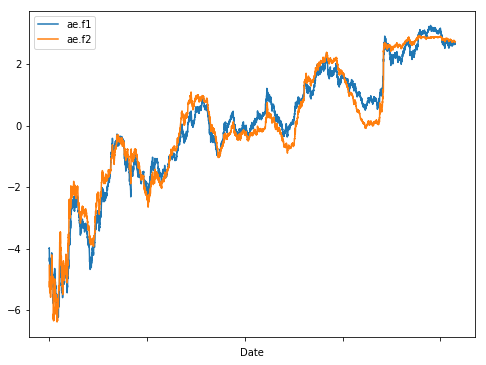

In [15]:
encoded_rates = pd.DataFrame(encoder.predict(RatesNormalized), index=RatesData.index, columns=['ae.f1', 'ae.f2'])
print(encoded_rates.head())
encoded_rates.plot();

Autoencoder returned two factors which are almost duplicates of each other.

Calculate factor loadings for autoencoder factors by fitting regression.

Autoencoder loadings by regression: 
    maturities   rega.l1   rega.l2
0        0.25 -0.038225 -0.183128
1        0.50 -0.044990 -0.169534
2        2.00 -0.065949 -0.037895
3        3.00  0.040981 -0.117498
4        5.00 -0.258528 -0.105455
5       10.00 -0.229340 -0.040220
6       30.00 -0.036808  0.084701


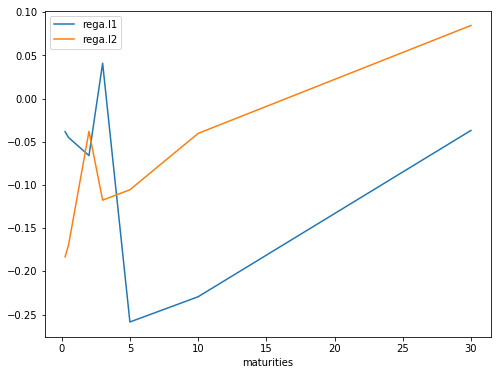

In [16]:
# Train the models for both factors 
rfa1 = regr.fit(RatesData, encoded_rates['ae.f1'])
rega_l1 =pd.DataFrame({'rega.l1': rfa1.coef_})

rfa2 = regr.fit(RatesData, encoded_rates['ae.f2'])
rega_l2 =pd.DataFrame({'rega.l2': rfa2.coef_})

ae_loadings_by_regression = maturities.join([rega_l1,rega_l2])
print('Autoencoder loadings by regression: \n',ae_loadings_by_regression)
ae_loadings_by_regression.plot(x='maturities',y=['rega.l1','rega.l2'])

Factor loadings are also different from PCA loadings.

Reacall that PCA does not have unique solution. It returns a canonical solution up to a rotation of factors.

Check correlation matrix of PCA factors combined with the encoded data.

In [17]:
pd.concat([pca_factors, encoded_rates], axis=1).corr().round(2)

,pca.f1,pca.f2,pca.f3,pca.f4,pca.f5,pca.f6,pca.f7,ae.f1,ae.f2
pca.f1,1.00,0.00,0.0,0.00,-0.00,0.0,-0.0,-1.00,-0.99
pca.f2,0.00,1.00,-0.0,0.00,-0.00,-0.0,-0.0,0.08,-0.11
pca.f3,0.00,-0.00,1.0,0.00,-0.00,0.0,-0.0,-0.00,0.00
pca.f4,0.00,0.00,0.0,1.00,-0.00,-0.0,-0.0,0.01,0.01
pca.f5,-0.00,-0.00,-0.0,-0.00,1.00,0.0,0.0,0.01,0.00
pca.f6,0.00,-0.00,0.0,-0.00,0.00,1.0,0.0,-0.00,0.00
pca.f7,-0.00,-0.00,-0.0,-0.00,0.00,0.0,1.0,-0.00,0.00
ae.f1,-1.00,0.08,-0.0,0.01,0.01,-0.0,-0.0,1.00,0.98
ae.f2,-0.99,-0.11,0.0,0.01,0.00,0.0,0.0,0.98,1.00


It is clear that factors from autoencoder do not represent canonical solution.

Rotate both factors and loadings to decorrelate factors. Rotation is done by eigenvectors of the covariance matrix of the encoded factors. 

In [18]:
encoded_rates.cov() # autoencoder factors covariance

,ae.f1,ae.f2
ae.f1,4.223472,4.072666
ae.f2,4.072666,4.068951


In [19]:
eg_vect_factors = np.linalg.eig(encoded_rates.cov())[1]
eg_vect_factors = pd.DataFrame(eg_vect_factors)
eg_vect_factors # matrix of eigenvectors of covariance matrix

,0,1
0,0.713781,-0.700369
1,0.700369,0.713781


Eigenvectors decompose covariance matrix of factors as:
$$\Sigma = U \Lambda U^T,$$
where $\Sigma$ is the covariance matrix of factors. Eigenvectors are orthonormal, i.e.
$$UU^T = I.$$

PCA model is:
$$Y_0 = FL^T.$$
Then rotation of factors and loadings is done by:
$$Y_0 = FL^T = FUU^TL^T =(FU)(U^TL^T) = (FU)(LU)^T = F_{New}L^T_{New}.$$

Rotate the autoencoder factors.

In [20]:
rotated_factors = pd.DataFrame(np.dot(encoded_rates,eg_vect_factors), \
                              columns=['rot.f1','rot.f2'])
rotated_factors.head()

,rot.f1,rot.f2
0,-6.028976,-0.446111
1,-6.032419,-0.473050
2,-6.496770,-0.581337
3,-6.585499,-0.628023
4,-6.835703,-0.660181


Check that rotated factors are not correlated.

In [21]:
rotated_factors.cov()

,rot.f1,rot.f2
rot.f1,8.219610e+00,-1.012003e-15
rot.f2,-1.012003e-15,7.281314e-02


Compare the PCA factors with the rotated autoencoder factors.

Plot first factors.

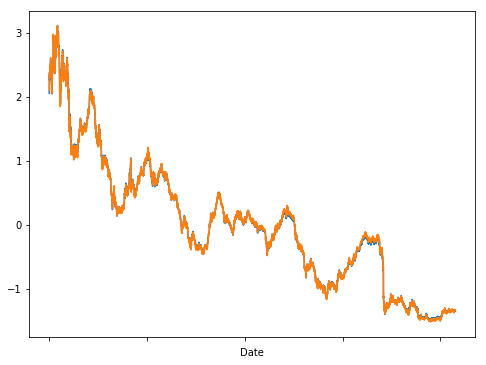

In [22]:
pca_f_plot = pca_factors['pca.f1']/pca_factors['pca.f1'].std()
rot_f_plot = -rotated_factors['rot.f1']/rotated_factors['rot.f1'].std()
pca_f_plot.plot()
rot_f_plot.plot()
plt.show()

Plot second factors.

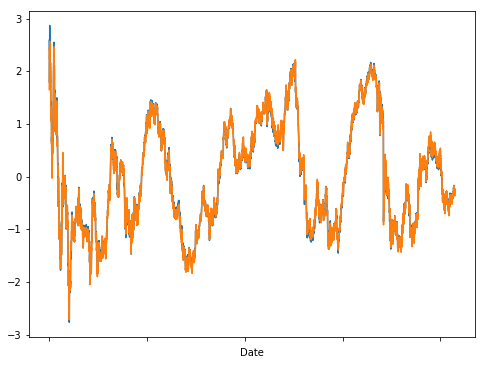

In [23]:
pca_f_plot = pca_factors['pca.f2']/pca_factors['pca.f2'].std()
rot_f_plot = -rotated_factors['rot.f2']/rotated_factors['rot.f2'].std()
pca_f_plot.plot()
rot_f_plot.plot()
plt.show()

Both factors after rotation became very similar to the corresponding PCA factors. 

Rotate the loadings by the same eigenvectors.

   maturities    rot.l1    rot.l2
0        0.25 -0.155541 -0.103942
1        0.50 -0.150850 -0.089500
2        2.00 -0.073614  0.019140
3        3.00 -0.053041 -0.112570
4        5.00 -0.258390  0.105793
5       10.00 -0.191867  0.131914
6       30.00  0.033049  0.086237


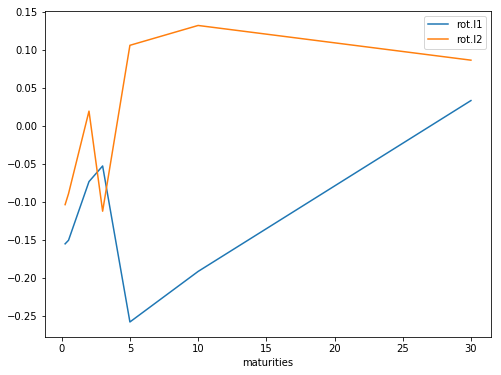

In [24]:
rotated_loadings = pd.DataFrame(np.dot(ae_loadings_by_regression[['rega.l1','rega.l2']], \
                                       eg_vect_factors),columns=['rot.l1','rot.l2'])
rotated_loadings = maturities.join(rotated_loadings)
print(rotated_loadings)
rotated_loadings.plot(x='maturities',y=['rot.l1','rot.l2'])

Shapes of the rotated loadings do not look like the shapes of the PCA loadings. Compare the corresponding loadings.

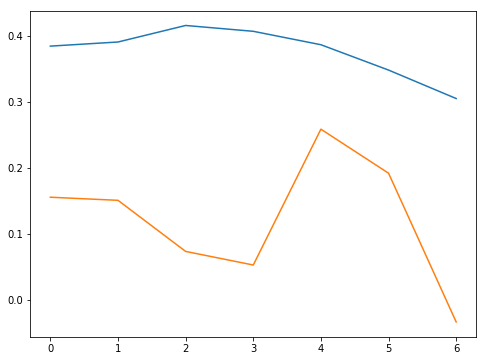

In [25]:
pca_l_plot = pca_loadings['pca.l1']
rot_l_plot = -rotated_loadings['rot.l1']
pca_l_plot.plot(x=maturities)
rot_l_plot.plot(x=maturities)
plt.show()

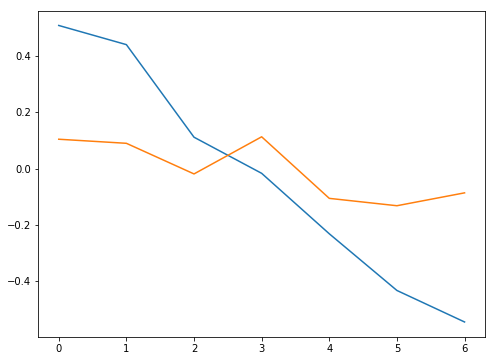

In [26]:
pca_l_plot = pca_loadings['pca.l2']
rot_l_plot = -rotated_loadings['rot.l2']
pca_l_plot.plot()
rot_l_plot.plot()
plt.show()

Now compare mean squared errors for autoencoder factors...

In [27]:
decoded_rates = pd.DataFrame(decoder.predict(encoded_rates), index=RatesData.index, columns=RatesData.columns)
decoded_rates = decoded_rates * RatesData.std() + RatesData.mean()  # denormalize
se = (RatesData - decoded_rates)**2
se.values.mean()

0.03614436426902065

... with mse for PCA with two factors:

In [28]:
n_factors = 2
loadings = pca.components_[:n_factors, :]
pca_restored = np.dot(pca_factors.iloc[:, :n_factors], loadings) + pca.mean_
pca_restored = pd.DataFrame(pca_restored, columns=RatesData.columns, index=RatesData.index)

se = (RatesData - pca_restored)**2
se.values.mean()

0.02123487490550489

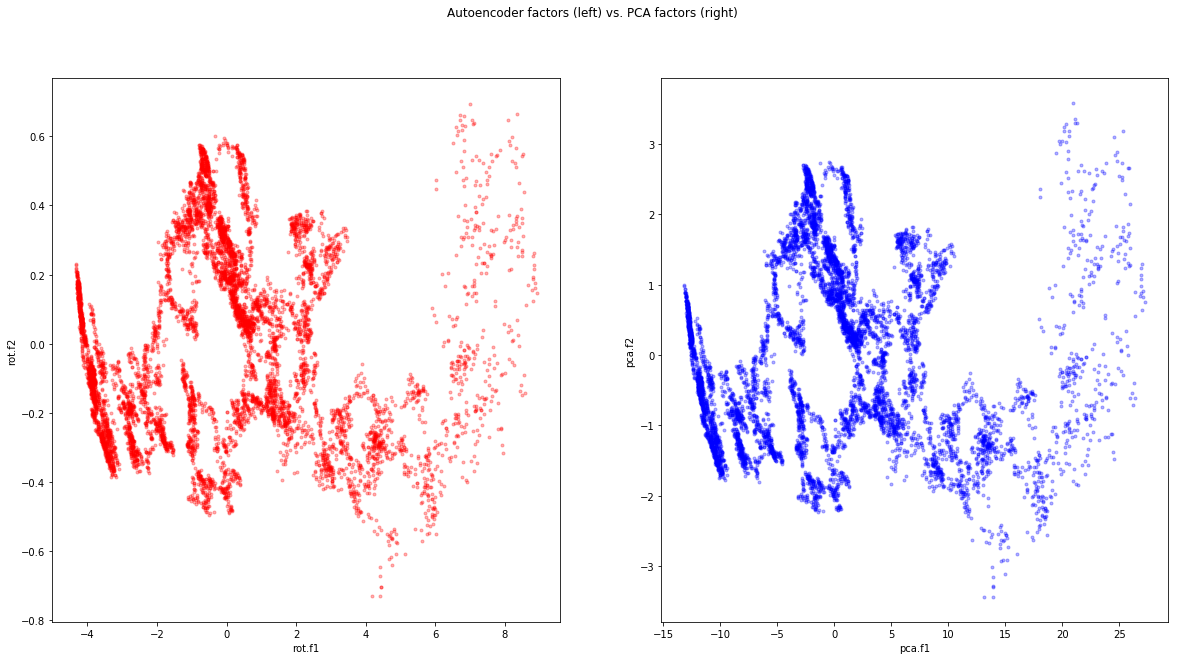

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 10))
axes[0].scatter(-rotated_factors['rot.f1'], -rotated_factors['rot.f2'], alpha=0.3, marker='.', c='r')
axes[0].set_xlabel('rot.f1')
axes[0].set_ylabel('rot.f2')
axes[1].scatter(pca_factors['pca.f1'],  pca_factors['pca.f2'],  alpha=0.3, marker='.', c='b')
axes[1].set_xlabel('pca.f1')
axes[1].set_ylabel('pca.f2')
fig.suptitle('Autoencoder factors (left) vs. PCA factors (right)');

**Lesson**: Undercomplete autoencoder without activation function is almost equivalent to PCA, i.e. selects almost the same linear manifold in feature space. However, autoencoder loadings are not guaranteed to be eigenvectors of the correlation matrix of the original features and factors are not automatically uncorrelated like factors in PCA.

Also, in this example PCA gave smaller MSE than the autoencoder model. However, this comparison is done for in-sample data only.